In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [18]:
import shutil

# Path to the file in Google Drive
file_path = '/content/drive/My Drive/dataset.zip'

# Destination path in /content/
destination_path = '/content/dataset.zip'

# Copy the file
shutil.copy(file_path, destination_path)


'/content/dataset.zip'

In [48]:
import shutil

file_path = '/content/vgg16_FSK_NOTFSK.h5'

# Destination path within a folder in Google Drive
destination_path = '/content/drive/My Drive/vgg16_FSK_NOTFSK.h5'

# Copy the file
shutil.copy(file_path, destination_path)

'/content/drive/My Drive/vgg16_FSK_NOTFSK.h5'

In [32]:
!rm -rf /content/sample_data

In [19]:
import zipfile

zip_path = 'dataset.zip'  # Replace with the path to your zip file
extract_to = '/content/'  # Replace with the directory where you want to extract the contents

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Extracted '{zip_path}' to '{extract_to}'")


Extracted 'dataset.zip' to '/content/'


In [4]:
pip install split-folders

In [33]:
import numpy as np
import splitfolders
import tensorflow.keras as keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.losses import categorical_crossentropy
import os
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


splitfolders.ratio('/content/dataset',output='/content/datasplit', seed=1337, ratio=(0.7,0.2,0.1),group_prefix=None, move=False)

class_names=["FSK","NOT_FSK"]

#weights_path = 'E:/Drone_Signal_Classification/WITH_NOISE/Elsec_Dataset/weights/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'


datagen = ImageDataGenerator(rescale = 1./255)

train_generator = datagen.flow_from_directory(
    directory = "/content/datasplit/train",
    classes = class_names,
    target_size = (224,224),
    batch_size = 16,
    class_mode = "binary",
    subset="training"
)


valid_generator = datagen.flow_from_directory(
    directory = "/content/datasplit/val",
    classes = class_names,
    target_size = (224,224),
    batch_size = 16,
    class_mode = "binary",
)

test_generator = datagen.flow_from_directory(
    directory = "/content/datasplit/test",
    classes = class_names,
    target_size = (224,224),
    batch_size = 8,
    class_mode = "binary",
    shuffle = False
)


model_vgg16 = VGG16(input_shape=(224,224,3),include_top = False,weights ="imagenet")

for layer in model_vgg16.layers:
  layer.trainable=False


model = Sequential()
model.add(model_vgg16)
model.add(Flatten())
model.add(Dense(512,activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(1,activation ="sigmoid"))

model.summary()

model.compile(optimizer="adam",loss="binary_crossentropy",metrics =["accuracy"])



Copying files: 16000 files [00:01, 8439.44 files/s]


Found 11200 images belonging to 2 classes.
Found 3200 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               12845568  
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 27560769 (105.14 MB)
Trainable params: 128460

In [34]:
history = model.fit(train_generator,validation_data = valid_generator,epochs = 25)

Epoch 1/25
700/700 [==============================] - 73s 96ms/step - loss: 0.0812 - accuracy: 0.9753 - val_loss: 0.0164 - val_accuracy: 0.9953
Epoch 2/25
700/700 [==============================] - 59s 84ms/step - loss: 0.0399 - accuracy: 0.9857 - val_loss: 0.0155 - val_accuracy: 0.9950
Epoch 3/25
700/700 [==============================] - 59s 84ms/step - loss: 0.0325 - accuracy: 0.9878 - val_loss: 0.0143 - val_accuracy: 0.9966
Epoch 4/25
700/700 [==============================] - 59s 84ms/step - loss: 0.0337 - accuracy: 0.9877 - val_loss: 0.0141 - val_accuracy: 0.9962
Epoch 5/25
700/700 [==============================] - 59s 84ms/step - loss: 0.0286 - accuracy: 0.9887 - val_loss: 0.0146 - val_accuracy: 0.9944
Epoch 6/25
700/700 [==============================] - 59s 84ms/step - loss: 0.0270 - accuracy: 0.9904 - val_loss: 0.0139 - val_accuracy: 0.9947
Epoch 7/25
700/700 [==============================] - 59s 84ms/step - loss: 0.0192 - accuracy: 0.9936 - val_loss: 0.0218 - val_accuracy:

In [35]:
test_loss, test_acc = model.evaluate(test_generator)
print("test loss: ", test_loss)
print("test accuracy: ", test_acc*100)

200/200 [==============================] - 11s 57ms/step - loss: 0.0224 - accuracy: 0.9969
test loss:  0.022390127182006836
test accuracy:  99.6874988079071


Found 1600 images belonging to 2 classes.
[0 0 0 ... 1 1 1]
200/200 [==============================] - 9s 44ms/step
[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


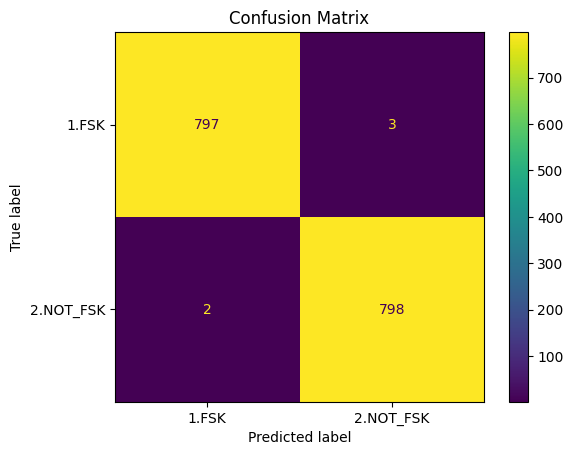

In [36]:
class_names=["1.FSK","2.NOT_FSK"]
test_generator = datagen.flow_from_directory(
    directory = "/content/datasplit/test",
    classes = class_names,
    target_size = (224,224),
    batch_size = 8,
    class_mode = "binary",
    shuffle = False
)


y_true =test_generator.classes
print(y_true)
y_pred = model.predict(test_generator)  # Get predicted probabilities
y_pred_binary = (y_pred > 0.5).astype(int)  # Classify based on threshold (0.5 is common)
print(y_pred_binary)
cm=confusion_matrix(y_true, y_pred_binary)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [47]:
model.save('vgg16_FSK_NOTFSK.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
